In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
train = pd.read_csv("train_data.csv")  
test = pd.read_csv("test_data.csv")    

# Target Variable
target = train["purchaseValue"]
train.drop(columns=["purchaseValue"], inplace=True)


df= pd.concat([train, test], axis=0)




In [3]:
df

,trafficSource.isTrueDirect,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,device.mobileInputSelector,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,True,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,1,not available in demo dataset,1475230692,Americas,False,NaN
29002,NaN,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,78,not available in demo dataset,1487866306,Americas,False,1.0
29003,NaN,Chrome,not available in demo dataset,NaN,NaN,medium,Region_1,Top,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Paid Search,not available in demo dataset,37,not available in demo dataset,1481853232,Americas,False,1.0
29004,NaN,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1481682985,Americas,False,1.0


In [4]:
df.shape


(145029, 51)

In [5]:
columns_to_drop = [
    'trafficSource.adwordsClickInfo.isVideoAd',
    'trafficSource.isTrueDirect',
    'totals.bounces',
    'new_visits',
    'trafficSource.adwordsClickInfo.slot',
    'trafficSource.adwordsClickInfo.adNetworkType',
    'trafficSource.adwordsClickInfo.page',
    'trafficSource.adContent',
    'trafficSource.referralPath',
    'trafficSource.keyword'
]

cleaned_df = df.drop(columns=columns_to_drop)


In [6]:
cleaned_df

,browser,device.screenResolution,screenSize,geoCluster,device.mobileDeviceBranding,device.mobileInputSelector,userId,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,...,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile
0,Edge,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,61421,(not set),not available in demo dataset,domain1,...,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False
1,Chrome,not available in demo dataset,medium,Region_3,not available in demo dataset,not available in demo dataset,72287,(not set),not available in demo dataset,domain3,...,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False
2,Chrome,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,25180,(not set),not available in demo dataset,domain1,...,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False
3,Internet Explorer,not available in demo dataset,medium,Region_4,not available in demo dataset,not available in demo dataset,41295,(not set),not available in demo dataset,domain3,...,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False
4,Chrome,not available in demo dataset,medium,Region_3,not available in demo dataset,not available in demo dataset,113697,(not set),not available in demo dataset,domain1,...,20161006,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,86392,(not set),not available in demo dataset,domain2,...,20160930,not available in demo dataset,desktop,Organic Search,not available in demo dataset,1,not available in demo dataset,1475230692,Americas,False
29002,Chrome,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,67605,(not set),not available in demo dataset,domain2,...,20170223,not available in demo dataset,desktop,Organic Search,not available in demo dataset,78,not available in demo dataset,1487866306,Americas,False
29003,Chrome,not available in demo dataset,medium,Region_1,not available in demo dataset,not available in demo dataset,22655,(not set),not available in demo dataset,domain1,...,20161215,not available in demo dataset,desktop,Paid Search,not available in demo dataset,37,not available in demo dataset,1481853232,Americas,False
29004,Chrome,not available in demo dataset,medium,Region_3,not available in demo dataset,not available in demo dataset,47126,(not set),not available in demo dataset,domain3,...,20161213,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1481682985,Americas,False


In [7]:
cleaned_df['pageViews'] = cleaned_df['pageViews'].fillna(cleaned_df['pageViews'].median())


In [8]:
cleaned_df


,browser,device.screenResolution,screenSize,geoCluster,device.mobileDeviceBranding,device.mobileInputSelector,userId,trafficSource.campaign,device.mobileDeviceMarketingName,geoNetwork.networkDomain,...,date,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile
0,Edge,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,61421,(not set),not available in demo dataset,domain1,...,20170714,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False
1,Chrome,not available in demo dataset,medium,Region_3,not available in demo dataset,not available in demo dataset,72287,(not set),not available in demo dataset,domain3,...,20170519,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False
2,Chrome,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,25180,(not set),not available in demo dataset,domain1,...,20171020,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False
3,Internet Explorer,not available in demo dataset,medium,Region_4,not available in demo dataset,not available in demo dataset,41295,(not set),not available in demo dataset,domain3,...,20170103,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False
4,Chrome,not available in demo dataset,medium,Region_3,not available in demo dataset,not available in demo dataset,113697,(not set),not available in demo dataset,domain1,...,20161006,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,86392,(not set),not available in demo dataset,domain2,...,20160930,not available in demo dataset,desktop,Organic Search,not available in demo dataset,1,not available in demo dataset,1475230692,Americas,False
29002,Chrome,not available in demo dataset,medium,Region_2,not available in demo dataset,not available in demo dataset,67605,(not set),not available in demo dataset,domain2,...,20170223,not available in demo dataset,desktop,Organic Search,not available in demo dataset,78,not available in demo dataset,1487866306,Americas,False
29003,Chrome,not available in demo dataset,medium,Region_1,not available in demo dataset,not available in demo dataset,22655,(not set),not available in demo dataset,domain1,...,20161215,not available in demo dataset,desktop,Paid Search,not available in demo dataset,37,not available in demo dataset,1481853232,Americas,False
29004,Chrome,not available in demo dataset,medium,Region_3,not available in demo dataset,not available in demo dataset,47126,(not set),not available in demo dataset,domain3,...,20161213,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1481682985,Americas,False


In [9]:
cleaned_df.dtypes

browser                              object
device.screenResolution              object
screenSize                           object
geoCluster                           object
device.mobileDeviceBranding          object
device.mobileInputSelector           object
userId                                int64
trafficSource.campaign               object
device.mobileDeviceMarketingName     object
geoNetwork.networkDomain             object
gclIdPresent                          int64
device.operatingSystemVersion        object
sessionNumber                         int64
device.flashVersion                  object
geoNetwork.region                    object
trafficSource                        object
totals.visits                         int64
geoNetwork.networkLocation           object
sessionId                             int64
os                                   object
geoNetwork.subContinent              object
trafficSource.medium                 object
browserMajor                    

In [10]:
cleaned_df.shape


(145029, 41)

In [11]:
# Drop constant columns
cleaned_df.drop(columns=['device.screenResolution', 'screenSize'], inplace=True)


In [12]:
# Find columns with only one unique value (constant columns)
constant_columns = [col for col in cleaned_df.columns if cleaned_df[col].nunique(dropna=False) == 1]

print("Constant columns (only 1 unique value):")
print(constant_columns)


Constant columns (only 1 unique value):
['device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'totals.visits', 'geoNetwork.networkLocation', 'browserMajor', 'device.browserSize', 'socialEngagementType', 'locationZone', 'device.mobileDeviceModel', 'device.language', 'device.browserVersion', 'device.screenColors']


In [13]:
# Drop constant columns from the dataset
cleaned_df.drop(columns=constant_columns, inplace=True)


In [14]:
cleaned_df

,browser,geoCluster,userId,trafficSource.campaign,geoNetwork.networkDomain,gclIdPresent,sessionNumber,geoNetwork.region,trafficSource,sessionId,...,geoNetwork.city,geoNetwork.metro,pageViews,date,deviceType,userChannel,totalHits,sessionStart,geoNetwork.continent,device.isMobile
0,Edge,Region_2,61421,(not set),domain1,0,1,Washington,youtube.com,1500100799,...,Redmond,Seattle-Tacoma WA,1.0,20170714,desktop,Social,1,1500100799,Americas,False
1,Chrome,Region_3,72287,(not set),domain3,0,1,California,(direct),1495262065,...,Mountain View,San Francisco-Oakland-San Jose CA,1.0,20170519,desktop,Direct,1,1495262065,Americas,False
2,Chrome,Region_2,25180,(not set),domain1,0,2,Lombardy,google,1508510328,...,Milan,(not set),6.0,20171020,desktop,Organic Search,6,1508510328,Europe,False
3,Internet Explorer,Region_4,41295,(not set),domain3,0,1,not available in demo dataset,youtube.com,1483431838,...,not available in demo dataset,not available in demo dataset,1.0,20170103,desktop,Social,1,1483431838,Asia,False
4,Chrome,Region_3,113697,(not set),domain1,0,1,not available in demo dataset,(direct),1475804633,...,not available in demo dataset,not available in demo dataset,54.0,20161006,desktop,Direct,66,1475804633,Americas,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,Region_2,86392,(not set),domain2,0,16,State of Sao Paulo,google,1475230692,...,Sao Paulo,(not set),1.0,20160930,desktop,Organic Search,1,1475230692,Americas,False
29002,Chrome,Region_2,67605,(not set),domain2,0,1,not available in demo dataset,google,1487866306,...,not available in demo dataset,not available in demo dataset,56.0,20170223,desktop,Organic Search,78,1487866306,Americas,False
29003,Chrome,Region_1,22655,(not set),domain1,1,1,not available in demo dataset,(direct),1481853232,...,not available in demo dataset,not available in demo dataset,30.0,20161215,desktop,Paid Search,37,1481853232,Americas,False
29004,Chrome,Region_3,47126,(not set),domain3,0,1,not available in demo dataset,youtube.com,1481682985,...,not available in demo dataset,not available in demo dataset,1.0,20161213,desktop,Social,1,1481682985,Americas,False


In [15]:
cleaned_df['device.isMobile'] = cleaned_df['device.isMobile'].astype(int)


In [16]:
cleaned_df['geoNetwork.metro'] = cleaned_df['geoNetwork.metro'].replace('not set', 'not available in demo dataset')


In [17]:
cleaned_df.drop('trafficSource.campaign', axis=1, inplace=True)


In [18]:
cleaned_df

,browser,geoCluster,userId,geoNetwork.networkDomain,gclIdPresent,sessionNumber,geoNetwork.region,trafficSource,sessionId,os,...,geoNetwork.city,geoNetwork.metro,pageViews,date,deviceType,userChannel,totalHits,sessionStart,geoNetwork.continent,device.isMobile
0,Edge,Region_2,61421,domain1,0,1,Washington,youtube.com,1500100799,Windows,...,Redmond,Seattle-Tacoma WA,1.0,20170714,desktop,Social,1,1500100799,Americas,0
1,Chrome,Region_3,72287,domain3,0,1,California,(direct),1495262065,Macintosh,...,Mountain View,San Francisco-Oakland-San Jose CA,1.0,20170519,desktop,Direct,1,1495262065,Americas,0
2,Chrome,Region_2,25180,domain1,0,2,Lombardy,google,1508510328,Windows,...,Milan,(not set),6.0,20171020,desktop,Organic Search,6,1508510328,Europe,0
3,Internet Explorer,Region_4,41295,domain3,0,1,not available in demo dataset,youtube.com,1483431838,Windows,...,not available in demo dataset,not available in demo dataset,1.0,20170103,desktop,Social,1,1483431838,Asia,0
4,Chrome,Region_3,113697,domain1,0,1,not available in demo dataset,(direct),1475804633,Windows,...,not available in demo dataset,not available in demo dataset,54.0,20161006,desktop,Direct,66,1475804633,Americas,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,Region_2,86392,domain2,0,16,State of Sao Paulo,google,1475230692,Macintosh,...,Sao Paulo,(not set),1.0,20160930,desktop,Organic Search,1,1475230692,Americas,0
29002,Chrome,Region_2,67605,domain2,0,1,not available in demo dataset,google,1487866306,Macintosh,...,not available in demo dataset,not available in demo dataset,56.0,20170223,desktop,Organic Search,78,1487866306,Americas,0
29003,Chrome,Region_1,22655,domain1,1,1,not available in demo dataset,(direct),1481853232,Macintosh,...,not available in demo dataset,not available in demo dataset,30.0,20161215,desktop,Paid Search,37,1481853232,Americas,0
29004,Chrome,Region_3,47126,domain3,0,1,not available in demo dataset,youtube.com,1481682985,Linux,...,not available in demo dataset,not available in demo dataset,1.0,20161213,desktop,Social,1,1481682985,Americas,0


In [19]:
cleaned_df['geoNetwork.metro'] = cleaned_df['geoNetwork.metro'].replace('not set', 'not available in demo dataset')


In [20]:
cleaned_df

,browser,geoCluster,userId,geoNetwork.networkDomain,gclIdPresent,sessionNumber,geoNetwork.region,trafficSource,sessionId,os,...,geoNetwork.city,geoNetwork.metro,pageViews,date,deviceType,userChannel,totalHits,sessionStart,geoNetwork.continent,device.isMobile
0,Edge,Region_2,61421,domain1,0,1,Washington,youtube.com,1500100799,Windows,...,Redmond,Seattle-Tacoma WA,1.0,20170714,desktop,Social,1,1500100799,Americas,0
1,Chrome,Region_3,72287,domain3,0,1,California,(direct),1495262065,Macintosh,...,Mountain View,San Francisco-Oakland-San Jose CA,1.0,20170519,desktop,Direct,1,1495262065,Americas,0
2,Chrome,Region_2,25180,domain1,0,2,Lombardy,google,1508510328,Windows,...,Milan,(not set),6.0,20171020,desktop,Organic Search,6,1508510328,Europe,0
3,Internet Explorer,Region_4,41295,domain3,0,1,not available in demo dataset,youtube.com,1483431838,Windows,...,not available in demo dataset,not available in demo dataset,1.0,20170103,desktop,Social,1,1483431838,Asia,0
4,Chrome,Region_3,113697,domain1,0,1,not available in demo dataset,(direct),1475804633,Windows,...,not available in demo dataset,not available in demo dataset,54.0,20161006,desktop,Direct,66,1475804633,Americas,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,Region_2,86392,domain2,0,16,State of Sao Paulo,google,1475230692,Macintosh,...,Sao Paulo,(not set),1.0,20160930,desktop,Organic Search,1,1475230692,Americas,0
29002,Chrome,Region_2,67605,domain2,0,1,not available in demo dataset,google,1487866306,Macintosh,...,not available in demo dataset,not available in demo dataset,56.0,20170223,desktop,Organic Search,78,1487866306,Americas,0
29003,Chrome,Region_1,22655,domain1,1,1,not available in demo dataset,(direct),1481853232,Macintosh,...,not available in demo dataset,not available in demo dataset,30.0,20161215,desktop,Paid Search,37,1481853232,Americas,0
29004,Chrome,Region_3,47126,domain3,0,1,not available in demo dataset,youtube.com,1481682985,Linux,...,not available in demo dataset,not available in demo dataset,1.0,20161213,desktop,Social,1,1481682985,Americas,0


In [21]:
cleaned_df.dtypes

browser                      object
geoCluster                   object
userId                        int64
geoNetwork.networkDomain     object
gclIdPresent                  int64
sessionNumber                 int64
geoNetwork.region            object
trafficSource                object
sessionId                     int64
os                           object
geoNetwork.subContinent      object
trafficSource.medium         object
locationCountry              object
geoNetwork.city              object
geoNetwork.metro             object
pageViews                   float64
date                          int64
deviceType                   object
userChannel                  object
totalHits                     int64
sessionStart                  int64
geoNetwork.continent         object
device.isMobile               int32
dtype: object

In [22]:
cleaned_df.shape

(145029, 23)

In [23]:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'], format='%Y%m%d')
cleaned_df['sessionStart'] = pd.to_datetime(cleaned_df['sessionStart'], unit='s')

# Extract features
cleaned_df['day'] = cleaned_df['date'].dt.day
cleaned_df['month'] = cleaned_df['date'].dt.month
cleaned_df['weekday'] = cleaned_df['date'].dt.weekday
cleaned_df['hour'] = cleaned_df['sessionStart'].dt.hour


In [24]:
cleaned_df

,browser,geoCluster,userId,geoNetwork.networkDomain,gclIdPresent,sessionNumber,geoNetwork.region,trafficSource,sessionId,os,...,deviceType,userChannel,totalHits,sessionStart,geoNetwork.continent,device.isMobile,day,month,weekday,hour
0,Edge,Region_2,61421,domain1,0,1,Washington,youtube.com,1500100799,Windows,...,desktop,Social,1,2017-07-15 06:39:59,Americas,0,14,7,4,6
1,Chrome,Region_3,72287,domain3,0,1,California,(direct),1495262065,Macintosh,...,desktop,Direct,1,2017-05-20 06:34:25,Americas,0,19,5,4,6
2,Chrome,Region_2,25180,domain1,0,2,Lombardy,google,1508510328,Windows,...,desktop,Organic Search,6,2017-10-20 14:38:48,Europe,0,20,10,4,14
3,Internet Explorer,Region_4,41295,domain3,0,1,not available in demo dataset,youtube.com,1483431838,Windows,...,desktop,Social,1,2017-01-03 08:23:58,Asia,0,3,1,1,8
4,Chrome,Region_3,113697,domain1,0,1,not available in demo dataset,(direct),1475804633,Windows,...,desktop,Direct,66,2016-10-07 01:43:53,Americas,0,6,10,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,Region_2,86392,domain2,0,16,State of Sao Paulo,google,1475230692,Macintosh,...,desktop,Organic Search,1,2016-09-30 10:18:12,Americas,0,30,9,4,10
29002,Chrome,Region_2,67605,domain2,0,1,not available in demo dataset,google,1487866306,Macintosh,...,desktop,Organic Search,78,2017-02-23 16:11:46,Americas,0,23,2,3,16
29003,Chrome,Region_1,22655,domain1,1,1,not available in demo dataset,(direct),1481853232,Macintosh,...,desktop,Paid Search,37,2016-12-16 01:53:52,Americas,0,15,12,3,1
29004,Chrome,Region_3,47126,domain3,0,1,not available in demo dataset,youtube.com,1481682985,Linux,...,desktop,Social,1,2016-12-14 02:36:25,Americas,0,13,12,1,2


In [25]:
cleaned_df.shape

(145029, 27)

In [26]:
cleaned_df.dtypes

browser                             object
geoCluster                          object
userId                               int64
geoNetwork.networkDomain            object
gclIdPresent                         int64
sessionNumber                        int64
geoNetwork.region                   object
trafficSource                       object
sessionId                            int64
os                                  object
geoNetwork.subContinent             object
trafficSource.medium                object
locationCountry                     object
geoNetwork.city                     object
geoNetwork.metro                    object
pageViews                          float64
date                        datetime64[ns]
deviceType                          object
userChannel                         object
totalHits                            int64
sessionStart                datetime64[ns]
geoNetwork.continent                object
device.isMobile                      int32
day        

In [27]:
cleaned_df.drop(['date', 'sessionStart'], axis=1, inplace=True)


In [28]:
cleaned_df

,browser,geoCluster,userId,geoNetwork.networkDomain,gclIdPresent,sessionNumber,geoNetwork.region,trafficSource,sessionId,os,...,pageViews,deviceType,userChannel,totalHits,geoNetwork.continent,device.isMobile,day,month,weekday,hour
0,Edge,Region_2,61421,domain1,0,1,Washington,youtube.com,1500100799,Windows,...,1.0,desktop,Social,1,Americas,0,14,7,4,6
1,Chrome,Region_3,72287,domain3,0,1,California,(direct),1495262065,Macintosh,...,1.0,desktop,Direct,1,Americas,0,19,5,4,6
2,Chrome,Region_2,25180,domain1,0,2,Lombardy,google,1508510328,Windows,...,6.0,desktop,Organic Search,6,Europe,0,20,10,4,14
3,Internet Explorer,Region_4,41295,domain3,0,1,not available in demo dataset,youtube.com,1483431838,Windows,...,1.0,desktop,Social,1,Asia,0,3,1,1,8
4,Chrome,Region_3,113697,domain1,0,1,not available in demo dataset,(direct),1475804633,Windows,...,54.0,desktop,Direct,66,Americas,0,6,10,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Chrome,Region_2,86392,domain2,0,16,State of Sao Paulo,google,1475230692,Macintosh,...,1.0,desktop,Organic Search,1,Americas,0,30,9,4,10
29002,Chrome,Region_2,67605,domain2,0,1,not available in demo dataset,google,1487866306,Macintosh,...,56.0,desktop,Organic Search,78,Americas,0,23,2,3,16
29003,Chrome,Region_1,22655,domain1,1,1,not available in demo dataset,(direct),1481853232,Macintosh,...,30.0,desktop,Paid Search,37,Americas,0,15,12,3,1
29004,Chrome,Region_3,47126,domain3,0,1,not available in demo dataset,youtube.com,1481682985,Linux,...,1.0,desktop,Social,1,Americas,0,13,12,1,2


In [29]:
cleaned_df.shape

(145029, 25)

In [30]:
cleaned_df.dtypes

browser                      object
geoCluster                   object
userId                        int64
geoNetwork.networkDomain     object
gclIdPresent                  int64
sessionNumber                 int64
geoNetwork.region            object
trafficSource                object
sessionId                     int64
os                           object
geoNetwork.subContinent      object
trafficSource.medium         object
locationCountry              object
geoNetwork.city              object
geoNetwork.metro             object
pageViews                   float64
deviceType                   object
userChannel                  object
totalHits                     int64
geoNetwork.continent         object
device.isMobile               int32
day                           int32
month                         int32
weekday                       int32
hour                          int32
dtype: object

In [31]:
cleaned_df.isnull().sum()


browser                     0
geoCluster                  0
userId                      0
geoNetwork.networkDomain    0
gclIdPresent                0
sessionNumber               0
geoNetwork.region           0
trafficSource               0
sessionId                   0
os                          0
geoNetwork.subContinent     0
trafficSource.medium        0
locationCountry             0
geoNetwork.city             0
geoNetwork.metro            0
pageViews                   0
deviceType                  0
userChannel                 0
totalHits                   0
geoNetwork.continent        0
device.isMobile             0
day                         0
month                       0
weekday                     0
hour                        0
dtype: int64

In [32]:
for col in cleaned_df.columns:
    if cleaned_df[col].nunique() == 1:
        print(col)



In [33]:
print(cleaned_df.duplicated().sum())


391


In [34]:
cleaned_df = cleaned_df.drop_duplicates()


In [35]:
for col in cleaned_df.select_dtypes(include='object').columns:
    print(f"{col}: {cleaned_df[col].nunique()}")


browser: 37
geoCluster: 5
geoNetwork.networkDomain: 3
geoNetwork.region: 404
trafficSource: 173
os: 18
geoNetwork.subContinent: 23
trafficSource.medium: 7
locationCountry: 194
geoNetwork.city: 731
geoNetwork.metro: 110
deviceType: 3
userChannel: 8
geoNetwork.continent: 6


In [36]:
cleaned_df['geoNetwork.metro'].unique()


array(['Seattle-Tacoma WA', 'San Francisco-Oakland-San Jose CA',
       '(not set)', 'not available in demo dataset', 'Chicago IL',
       'New York NY', 'Boston MA-Manchester NH', 'Pittsburgh PA',
       'Washington DC (Hagerstown MD)', 'London', 'Los Angeles CA',
       'Phoenix AZ', 'Atlanta GA',
       'Greenville-Spartanburg-Asheville-Anderson', 'Baltimore MD',
       'San Diego CA', 'Norfolk-Portsmouth-Newport News VA', 'JP_KANTO',
       'Houston TX', 'Detroit MI', 'Dallas-Ft. Worth TX',
       'Minneapolis-St. Paul MN', 'Roanoke-Lynchburg VA', 'Austin TX',
       'Oklahoma City OK', 'San Antonio TX', 'Portland OR', 'Columbus OH',
       'Omaha NE', 'Charlotte NC', 'Dayton OH',
       'Orlando-Daytona Beach-Melbourne FL', 'Midlands', 'Denver CO',
       'Nashville TN', 'Providence-New Bedford,MA',
       'Cleveland-Akron (Canton) OH', 'JP_KINKI',
       'Grand Rapids-Kalamazoo-Battle Creek MI', 'Philadelphia PA',
       'Raleigh-Durham (Fayetteville) NC', 'Kansas City MO', 'Nort

In [37]:
cleaned_df['geoNetwork.metro'].value_counts(dropna=False)


geoNetwork.metro
not available in demo dataset                74939
(not set)                                    27019
San Francisco-Oakland-San Jose CA            19945
New York NY                                   7187
Los Angeles CA                                2180
                                             ...  
Greenville-Spartanburg-Asheville-Anderson        1
Columbus GA                                      1
Birmingham (Ann and Tusc) AL                     1
Toledo OH                                        1
Anchorage AK                                     1
Name: count, Length: 110, dtype: int64

In [38]:
cleaned_df.loc[:, 'geoNetwork.metro'] = cleaned_df['geoNetwork.metro'].replace(
    ['(not set)', 'not available in demo dataset'],
    'Unknown'
)


In [39]:
print(cleaned_df.columns)


Index(['browser', 'geoCluster', 'userId', 'geoNetwork.networkDomain',
       'gclIdPresent', 'sessionNumber', 'geoNetwork.region', 'trafficSource',
       'sessionId', 'os', 'geoNetwork.subContinent', 'trafficSource.medium',
       'locationCountry', 'geoNetwork.city', 'geoNetwork.metro', 'pageViews',
       'deviceType', 'userChannel', 'totalHits', 'geoNetwork.continent',
       'device.isMobile', 'day', 'month', 'weekday', 'hour'],
      dtype='object')


In [40]:
# View missing value counts
missing_counts = cleaned_df.isnull().sum()
print("Missing values:\n", missing_counts[missing_counts > 0])


Missing values:
 Series([], dtype: int64)


In [41]:
# Check for leftover placeholders in object columns
for col in cleaned_df.select_dtypes(include='object').columns:
    if cleaned_df[col].isin(['(not set)', 'not set', 'unknown']).any():
        print(f"⚠️ Placeholder values still exist in: {col}")


⚠️ Placeholder values still exist in: browser
⚠️ Placeholder values still exist in: geoNetwork.region
⚠️ Placeholder values still exist in: trafficSource
⚠️ Placeholder values still exist in: os
⚠️ Placeholder values still exist in: geoNetwork.subContinent
⚠️ Placeholder values still exist in: trafficSource.medium
⚠️ Placeholder values still exist in: locationCountry
⚠️ Placeholder values still exist in: geoNetwork.city
⚠️ Placeholder values still exist in: geoNetwork.continent


In [42]:
# Define placeholder values to replace
placeholders = ['not set', '(not set)', 'unknown']

# Replace in all object columns
for col in cleaned_df.select_dtypes(include='object').columns:
    cleaned_df[col] = cleaned_df[col].replace(placeholders, 'not available in demo dataset')


C:\Users\rk871\AppData\Local\Temp\ipykernel_21628\3317195913.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = cleaned_df[col].replace(placeholders, 'not available in demo dataset')


In [43]:
for col in cleaned_df.select_dtypes(include='object').columns:
    if cleaned_df[col].isin(placeholders).any():
        print(f"⚠️ Placeholder values still exist in: {col}")


In [44]:
print(cleaned_df.dtypes)


browser                      object
geoCluster                   object
userId                        int64
geoNetwork.networkDomain     object
gclIdPresent                  int64
sessionNumber                 int64
geoNetwork.region            object
trafficSource                object
sessionId                     int64
os                           object
geoNetwork.subContinent      object
trafficSource.medium         object
locationCountry              object
geoNetwork.city              object
geoNetwork.metro             object
pageViews                   float64
deviceType                   object
userChannel                  object
totalHits                     int64
geoNetwork.continent         object
device.isMobile               int32
day                           int32
month                         int32
weekday                       int32
hour                          int32
dtype: object


array([[<Axes: title={'center': 'pageViews'}>,
        <Axes: title={'center': 'totalHits'}>]], dtype=object)

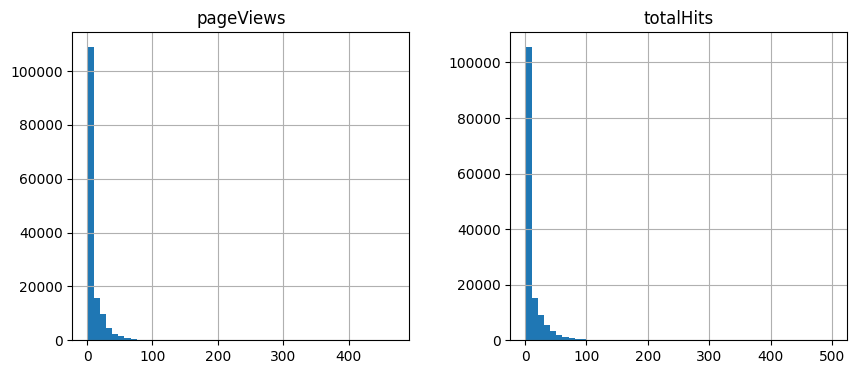

In [45]:
cleaned_df[['pageViews', 'totalHits']].hist(bins=50, figsize=(10, 4))


In [46]:
def check_cleaning_status():
    import pandas as pd
    
    print("🔍 Cleaning Status Summary")
    print("-" * 40)

    # 1. Check DataFrame shape
    print(f"✅ Shape: {cleaned_df.shape}")
    
    # 2. Check for missing values
    missing = cleaned_df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print("\n❌ Missing values detected:")
        print(missing)
    else:
        print("\n✅ No missing values found.")

    # 3. Check for placeholder values
    placeholders = ['not set', '(not set)', 'unknown']
    placeholder_cols = []
    for col in cleaned_df.select_dtypes(include='object').columns:
        if cleaned_df[col].isin(placeholders).any():
            placeholder_cols.append(col)
    
    if placeholder_cols:
        print("\n⚠️ Placeholder values still exist in:")
        for col in placeholder_cols:
            print(f" - {col}")
    else:
        print("\n✅ No placeholder values found.")

    print("-" * 40)


In [47]:
check_cleaning_status()


🔍 Cleaning Status Summary
----------------------------------------
✅ Shape: (144638, 25)

✅ No missing values found.

✅ No placeholder values found.
----------------------------------------


In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [49]:
[col for col in cleaned_df.columns if 'purchase' in col.lower()]


[]

In [50]:
print(df.columns)


Index(['trafficSource.isTrueDirect', 'browser', 'device.screenResolution',
       'trafficSource.adContent', 'trafficSource.keyword', 'screenSize',
       'geoCluster', 'trafficSource.adwordsClickInfo.slot',
       'device.mobileDeviceBranding', 'device.mobileInputSelector', 'userId',
       'trafficSource.campaign', 'device.mobileDeviceMarketingName',
       'geoNetwork.networkDomain', 'gclIdPresent',
       'device.operatingSystemVersion', 'sessionNumber', 'device.flashVersion',
       'geoNetwork.region', 'trafficSource', 'totals.visits',
       'geoNetwork.networkLocation', 'sessionId', 'os',
       'geoNetwork.subContinent', 'trafficSource.medium',
       'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor',
       'locationCountry', 'device.browserSize',
       'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType',
       'geoNetwork.city', 'trafficSource.adwordsClickInfo.page',
       'geoNetwork.metro', 'pageViews', 'locationZone',
       'device.mobileDe

In [51]:
# Merge target back
cleaned_df["purchaseValue"] = target


C:\Users\rk871\AppData\Local\Temp\ipykernel_21628\2583125671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["purchaseValue"] = target


In [52]:
cleaned_df.loc[:, "purchaseValue"] = target


In [53]:
cleaned_df = cleaned_df.dropna(subset=['purchaseValue'])


In [54]:
X = cleaned_df.drop(columns=["purchaseValue"])
y = cleaned_df["purchaseValue"]


In [55]:
X.info()
X.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 144638 entries, 0 to 29005
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   browser                   144638 non-null  object 
 1   geoCluster                144638 non-null  object 
 2   userId                    144638 non-null  int64  
 3   geoNetwork.networkDomain  144638 non-null  object 
 4   gclIdPresent              144638 non-null  int64  
 5   sessionNumber             144638 non-null  int64  
 6   geoNetwork.region         144638 non-null  object 
 7   trafficSource             144638 non-null  object 
 8   sessionId                 144638 non-null  int64  
 9   os                        144638 non-null  object 
 10  geoNetwork.subContinent   144638 non-null  object 
 11  trafficSource.medium      144638 non-null  object 
 12  locationCountry           144638 non-null  object 
 13  geoNetwork.city           144638 non-null  object 

,browser,geoCluster,userId,geoNetwork.networkDomain,gclIdPresent,sessionNumber,geoNetwork.region,trafficSource,sessionId,os,...,pageViews,deviceType,userChannel,totalHits,geoNetwork.continent,device.isMobile,day,month,weekday,hour
count,144638,144638,144638.000000,144638,144638.000000,144638.000000,144638,144638,1.446380e+05,144638,...,144638.000000,144638,144638,144638.000000,144638,144638.000000,144638.000000,144638.000000,144638.000000,144638.000000
unique,37,5,NaN,3,NaN,NaN,403,173,NaN,18,...,NaN,3,8,NaN,6,NaN,NaN,NaN,NaN,NaN
top,Chrome,Region_2,NaN,domain3,NaN,NaN,not available in demo dataset,google,NaN,Windows,...,NaN,desktop,Organic Search,NaN,Americas,NaN,NaN,NaN,NaN,NaN
freq,105342,29209,NaN,48271,NaN,NaN,78436,55260,NaN,48742,...,NaN,107773,58482,NaN,86963,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,61142.982626,NaN,0.037259,2.670792,NaN,NaN,1.493424e+09,NaN,...,8.383675,NaN,NaN,10.565405,NaN,0.254774,15.711307,6.933054,2.682504,12.799645
std,NaN,NaN,35242.784665,NaN,0.189395,10.240070,NaN,NaN,1.530464e+07,NaN,...,14.338609,NaN,NaN,19.582851,NaN,0.435736,8.729734,3.606943,1.913670,6.999055
min,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,NaN,1.470035e+09,NaN,...,1.000000,NaN,NaN,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,30671.000000,NaN,0.000000,1.000000,NaN,NaN,1.480039e+09,NaN,...,1.000000,NaN,NaN,1.000000,NaN,0.000000,8.000000,4.000000,1.000000,7.000000
50%,NaN,NaN,61102.500000,NaN,0.000000,1.000000,NaN,NaN,1.491619e+09,NaN,...,2.000000,NaN,NaN,2.000000,NaN,0.000000,16.000000,8.000000,3.000000,14.000000
75%,NaN,NaN,91676.750000,NaN,0.000000,2.000000,NaN,NaN,1.505154e+09,NaN,...,10.000000,NaN,NaN,12.000000,NaN,1.000000,23.000000,10.000000,4.000000,19.000000


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Step 1: Copy of features and target
X = cleaned_df.drop(columns=["purchaseValue"])
y = cleaned_df["purchaseValue"]

# Step 2: Label Encoding for Categorical Columns
cat_cols = X.select_dtypes(include='object').columns

le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to str to handle any NaN or mixed types
    le_dict[col] = le  # Store encoder if needed for future transformation

# Step 3: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = model.predict(X_val)
r2 = r2_score(y_val, y_pred)
print(f"✅ R² Score on Validation Set: {r2:.4f}")


✅ R² Score on Validation Set: 0.2631


In [57]:
# --- Feature Engineering & Data Improvements ---

# 1. Fill missing numeric values with median
for col in cleaned_df.select_dtypes(include=np.number).columns:
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].median())

# 2. Fill missing categorical values with mode
for col in cleaned_df.select_dtypes(include='object').columns:
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mode()[0])

# 3. Create interaction features (example: pageViews * totalHits)
if 'pageViews' in cleaned_df.columns and 'totalHits' in cleaned_df.columns:
    cleaned_df['pageViews_totalHits'] = cleaned_df['pageViews'] * cleaned_df['totalHits']

# 4. Log-transform skewed features (example: pageViews, totalHits, purchaseValue)
for col in ['pageViews', 'totalHits', 'purchaseValue']:
    if col in cleaned_df.columns:
        cleaned_df[f'log_{col}'] = np.log1p(cleaned_df[col])

# 5. Standard Scaling for numeric features
from sklearn.preprocessing import StandardScaler
num_cols = cleaned_df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
cleaned_df[num_cols] = scaler.fit_transform(cleaned_df[num_cols])

# ...existing code...

In [58]:
# Prepare features and target after feature engineering

# If you haven't already, merge the target back (for train rows only)
# cleaned_df["purchaseValue"] = target

# Drop any rows where purchaseValue is missing (should only be test set)
cleaned_df = cleaned_df.dropna(subset=['purchaseValue'])

# Separate features and target
X = cleaned_df.drop(columns=["purchaseValue"])
y = cleaned_df["purchaseValue"]

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

cat_cols = X.select_dtypes(include='object').columns
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le  # Save encoder for possible inverse_transform or test set

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_val)
r2 = r2_score(y_val, y_pred)
print(f"✅ R² Score on Validation Set: {r2:.4f}")

✅ R² Score on Validation Set: 0.9995


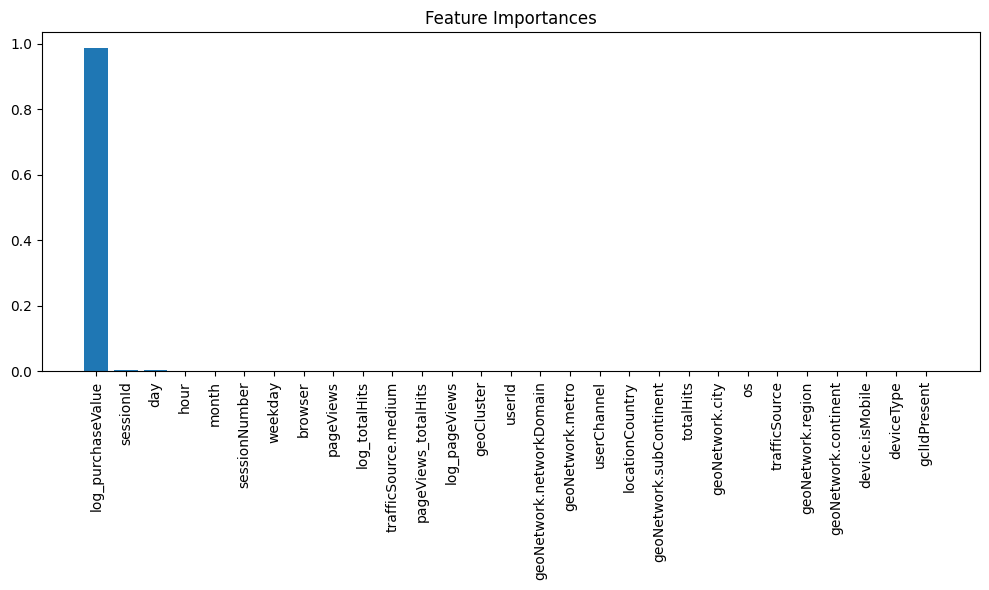

In [59]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Check correlation of all features with the target
import pandas as pd
correlations = pd.concat([X, y], axis=1).corr()
print(correlations['purchaseValue'].sort_values(ascending=False))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())

In [ ]:
# Check correlation of all features with the target
import pandas as pd
correlations = pd.concat([X, y], axis=1).corr()
print(correlations['purchaseValue'].sort_values(ascending=False))